# Mandelbrot Polynomials and Matrices

```{image} ../Figures/Mandelbrot/explosion32comp.gif
:height: 400px
:alt: Exploding Mandelbrot 32
:align: center
```

This unit uses some ideas of the late [Benoit Mandelbrot](https://en.wikipedia.org/wiki/Benoit_Mandelbrot) and some known facts about the so-called _Mandelbrot Set_, together with some of our own ideas, to help you to learn the following:

1. A bit more Python programming, including practice with _iteration_, _recursion_, _loop invariants_, _automatic differentiation_, _symbolic computation_, the use of _numerical libraries_ from NumPy, and a bit more about graphics.
2. A bit more about polynomials: the _cubic formula_ (we won't need the quartic formula, and even our use of the cubic formula is a bit contrived; but we think it's fun), the _cost of numerical solution of polynomials_ (we will point you to the current numerical champion polynomial solver, [MPSolve](https://en.wikipedia.org/wiki/MPSolve)), and the rather necessary-to-know notions of _numerical stability_ and _conditioning_.  Most of these topics are not taught as thoroughly as they should be, in one's first numerical analysis course; so this material here should strengthen the results when you do encounter them.
3. The surprising use of _eigenvalues_ to find roots of polynomials.  The first treatment of eigenvalues (typically in a Linear Algebra course, even though the problem is not, strictly speaking, linear) usually runs the other way around, and defines the eigenvalues of a matrix in terms of the _characteristic polynomial_ of the matrix. Indeed, we will teach you a concept not in the textbooks: namely, the concept of a _minimal height companion matrix_ and we will show you one such for the Mandelbrot polynomials.
4. A bit of _dynamical systems_, especially about _iteration_ and _composition_.
5. An excellent approximate formula for the _largest magnitude root_ of the Mandelbrot polynomial.
6. An honest-to-goodness analytic solution to the Mandelbrot iteration (this is a very new result, published only in 2021), valid for all $c$ _outside_ the Mandelbrot set.
7. That we don't know everything about Mandelbrot polynomials and matrices, and that you might be able to answer some open questions.

## The Mandelbrot Set and Mandelbrot Polynomials

The [Wikipedia article on the Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set) is pretty comprehensive, and readable. We'll sum up the definition here, and try to flesh it out a bit.  The definition is based on the following, apparently very simple, function:
\begin{equation*}
f(z) = z^2 + c 
\end{equation*}
This is apparently only a simple quadratic in $z$, and depends linearly on the constant $c$.  We now consider _what happens when we repeatedly apply this function_, starting at 0 (an apparently simple point).  That is, put 
\begin{equation*}
z_0 = 0
\end{equation*}
and then define $z_k$ for $k=1$, $k=2$, $k=3$, and so on in turn by the iterative formula (or recursive formula, or _dynamical_ formula)
\begin{equation*}
z_{n+1} = f(z_n) = z_n^2 + c .
\end{equation*}
This gives us $z_1 = z_0^2 + c = 0^2 + c = c$, and then subsequently $z_2 = z_1^2 + c = c^2 + c$, and then $z_3 = (c^2+c)^2 + c = c^4 + 2c^3 + c^2 + c$, and so on.

Several important things are going on here: this looks simple, and in one sense it is, but we will see some surprising things from this.  This is an example of a _nonlinear dynamical system_ (perhaps the "most famous" example of a nonlinear dynamical system).  We are repeatedly composing the function $f(z) = z^2+c$ with itself: $z_2 = f(c)$ and $z_3 = f(f(c))$ and $z_4 = f(f(f(c))$. Sometimes repeated composition is written with a power in brackets: $f^{(n)}(c)$ means $f(f(f(\cdots(f(c))\cdots)))$ where there are $n$ copies of $f$ used; this is where the pernicious notation $f^{(-1)}(c)$ comes from, by the way. We will try to avoid this confusing notation.  Several things can be deduced about repeated composition.  For instance, the result of composing two polynomials together is another polynomial.  If $f(c)$ is of degree $m$ and $g(c)$ is of degree $m$ then $f(g(c))$ is of degree $mn$, and so is $g(f(c))$.  If we were working with non-polynomials then we would also have to worry about matching up the domains and ranges, but polynomials are great because they always give a finite result output for any finite value input, and so composition always works.

We have written $z_3$ out above as an explicit degree $4$ polynomial (in the variable $c$), but if we actually want to compute a numerical value of $z_3$ given a numerical value for $c$ (say, $c=-1.2$) then it turns out to be better in several ways to just use the iterative formula itself and not the explicit polynomial. This is true even though we could write that explicit polynomial somewhat more efficiently in what is known as [Horner form](https://en.wikipedia.org/wiki/Horner%27s_method): $z_3 = c\cdot(1 + c\cdot(1 + c\cdot(2 + c)))$, which can be evaluated using only three floating-point multiplications and three floating-point additions. Using the iterative formula directly, though, there is no work to compute $z_0$, there is no floating-point work to compute $z_1 = c$, there is one multiplication and one addition to compute $z_2$, and one more multiplication and one more addition to compute $z_3$, showing that $z_3$ can be computed in only two "flops" instead of three.  Note: one "flop" is _defined to be_ one floating-point multiplication (or division) together with one floating-point addition (or subtraction).  It's not a fine-tuned measure; it was meant for use in older analyses of the cost of computation.  On modern architectures, the notion is not really all that helpful; but you can see here that no matter what, the cost is less if we use the iteration directly.  This advantage only increases as the iteration proceeds: to compute $z_4$ you only need one more "flop," i.e. $3$ flops, whereas from its polynomial form you need $2^3 = 8$ flops (even ignoring the work that has to be done simply to write the polynomial out).  For $z_{30}(c)$ the iteration takes only 29 flops; but the explicit polynomial is degree $2^{29}$ and would take $2^{29}$ flops to evaluate (actually, it's worse: we would have to use multiple precision to deal with the big integer coefficients).  Thus, somehow, the iteration has _compressed_ a very high degree polynomial into a very efficient box.

(MandelbrotActivity-1)=

```{admonition} Mandelbrot Activity 1
:class: tip
Read the Wikipedia entry on the Mandelbrot set, and the entry on Mandelbrot.  Mandelbrot's _educational_ books and papers are amazing, and amazingly clearly written.  If you don't come back from this activity, well, at least you left going in a good direction.
{ref}`[Our thoughts] <MandelbrotActivityReport-1>`
```

### Back to Mandelbrot iteration with a symbolic c

Another important thing to notice in the above is that by leaving $c$ symbolic, we have turned Mandelbrot's iteration formula (or recursion formula) into some kind of generator for certain polynomials.  These are called (naturally enough) _Mandelbrot polynomials_.  We list the first few here, or at least their coefficients.

In [1]:
import numpy as np
from numpy.polynomial import Polynomial as Poly
N = 8

z0 = Poly([0])
print( z0 )
c = Poly([0,1]) # We can do "symbolic polynomial arithmetic" just with these coefficient vectors in Python
z1 = z0*z0 + c
print( z1 )
z2 = z1*z1 + c
print( z2 )
z3 = z2*z2 + c
print( z3 )
z4 = z3*z3 + c
print( z4 )
z5 = z4*z4 + c
print( z5 )

0.0
0.0 + 1.0 x**1
0.0 + 1.0 x**1 + 1.0 x**2
0.0 + 1.0 x**1 + 1.0 x**2 + 2.0 x**3 + 1.0 x**4
0.0 + 1.0 x**1 + 1.0 x**2 + 2.0 x**3 + 5.0 x**4 + 6.0 x**5 + 6.0 x**6 +
4.0 x**7 + 1.0 x**8
0.0 + 1.0 x**1 + 1.0 x**2 + 2.0 x**3 + 5.0 x**4 + 14.0 x**5 + 26.0 x**6 +
44.0 x**7 + 69.0 x**8 + 94.0 x**9 + 114.0 x**10 + 116.0 x**11 +
94.0 x**12 + 60.0 x**13 + 28.0 x**14 + 8.0 x**15 + 1.0 x**16


Translating that Python notation for polynomials back into something standard, we have
\begin{align}
z_0 &= 0 \\
z_1 &= c \\
z_2 &= c + c^2 \\
z_3 &= c + c^2 + 2c^3 + c^4\\
z_4 &= c + c^2 + 2c^3 + 5c^4 + 6c^5 + 6c^6 + 4c^7 + c^8 \\
z_5 &= c + c^2 + 2c^3 + 5c^4 + 14c^5 + 26c^6 + 44c^7 + 69c^8 + 94c^9 + 114c^{10} + 116c^{11} + 94c^{12} + 60c^{13} + 28c^{14} + 8c^{15} + c^{16} 
\end{align}

The Mandelbrot set is _defined to be_ the set of $c$ for which this iteration remains bounded for all $n$: that is, everything _except_ those values of $c$ for which $|z_n| \to \infty$.  That's a weird sort of definition, and you have to first reassure yourself that there really are values of $c$ for which the $z_n$ do _not_ remain bounded.  Indeed, almost the first thing you would try was $c=1$: then $z_0 = 0$, $z_1 = 1$, $z_2 = 2$, $z_3 = 5$, $z_4 = 26$, and so on; each succeeding number is one more than the square of the previous, and this goes to infinity rapidly, in some sense.

## Some Activities with Mandelbrot polynomials with a more mathematical flavour

(MandelbrotActivity-2)=

```{admonition} Mandelbrot Activity 2
:class: tip
Prove by induction that the degree of the $n$th Mandelbrot polynomial is $2^{n-1}$, and that the leading coefficient is $1$.
{ref}`[Our proof] <MandelbrotActivityReport-2>`
```

(MandelbrotActivity-3)=

```{admonition} Mandelbrot Activity 3
:class: tip
 Prove that $c=-2$ and $c=0$ are both in the Mandelbrot set. Show that all zeros of Mandelbrot polynomials give _periodic orbits_ under the Mandelbrot iteration and are thus in the Mandelbrot set.
{ref}`[Our proofs] <MandelbrotActivityReport-3>`
```

(MandelbrotActivity-4)=

```{admonition} Mandelbrot Activity 4
:class: tip
Is $i = \sqrt{-1}$ in the Mandelbrot set?
{ref}`[Yes] <MandelbrotActivityReport-4>`
```

(MandelbrotActivity-5)=

```{admonition} Mandelbrot Activity 5
:class: tip
 Prove that the Mandelbrot polynomials are _unimodal_.  At the time we write this, this question is open: solve it, and you could publish a paper with your proof ([Maple Transactions](https://www.mapletransactions.org) would be a good place).  The word "unimodal" just means that the size of the coefficients increases to a peak, and then decays again.  As in $z_4$, the peak might be attained by two coefficients, not just one.  Seriously, we don't know how to prove this.  We think it's true, though.
{ref}`[We've got nothing.] <MandelbrotActivityReport-5>`
```

(MandelbrotActivity-6)=

```{admonition} Mandelbrot Activity 6
:class: tip
Solve $z_3 = 0$ by hand, as follows.  First, divide out the visible root, $c=0$, to get the cubic equation $0 = 1 + c + 2c^2 + c^3$.  Then put $c = \xi - 2/3$ so $c^3 = (\xi -2/3)^3 = \xi^3 - 2\xi^2 + 4\xi/9 - 8/27$ which will transform the equation into a cubic in $\xi$ of the form $0 = q + p\xi + \xi^3$.  Then put $\xi = u + v$ (introducing two new variables seems like the opposite of progress, but trust us, it will help).  This transforms the equation to $(u+v)^3 + p(u+v) + q = 0$, or $u^3 + 3uv(u+v) + p(u+v) + q = 0$.  Show that if you can find $u$ and $v$ that simultaneously solve $3uv + p = 0$ and $u^3 + v^3 + q = 0$ then you can solve the original equation.  Do so.  Your formula at the end should give you three, and only three, roots. Write out your answer explicitly, and compare it with (say) the answer from Wolfram Alpha. 
{ref}`[Our derivation] <MandelbrotActivityReport-6>`
```

## Programming Mandelbrot polynomial iterations
Let us write a short program to evaluate Mandelbrot polynomials of arbitrary order.  This code shows several features: how to define a procedure (function); how to set a type for a parameter (more of a hint than a requirement, sadly); the use of keyword arguments; and the use of comments.

In [2]:
# This short program will evaluate Mandelbrot polynomials at a given point,
# or else it will compute the coefficient vector of a Mandelbrot polynomial.
# Which it will do depends on the type of the argument "c."
def Mandelbrot(n: int, c):
    z = 0*c # try to inherit the type of c
    for i in range(n):
        z = z*z + c
    return(z)

z = Mandelbrot( 4, Poly([0, 1]) ) # The above code works with Polys (defined in previous cell)
print( z )

z = Mandelbrot( 4, -1.2 ) # The code also works with numeric input
print( z )

z = Mandelbrot( 21, 1.0j ) # Will work with complex numbers also
print( z )

z = Mandelbrot( 30, -1.2 ) # Since it is iterative, we can ask for high iteration numbers on numerical input
print( z )

# Don't try that with c = Poly([0,1]) though; the result would be a vector of length half a billion or so

zbig = Mandelbrot( 8, Poly( [0, 1] ) ) # n=8 is ghastly already; n=9 is twice as ghastly
print( zbig )

# If you forget the ordering, you can use keyword arguments ("kwargs")
zforgot = Mandelbrot( c=Poly([0,1]), n=5 )
print( zforgot )

0.0 + 1.0 x**1 + 1.0 x**2 + 2.0 x**3 + 5.0 x**4 + 6.0 x**5 + 6.0 x**6 +
4.0 x**7 + 1.0 x**8
0.10507775999999969
-1j
0.17381269635430296
0.0 + 1.0 x**1 + 1.0 x**2 + 2.0 x**3 + 5.0 x**4 + 14.0 x**5 + 42.0 x**6 +
132.0 x**7 + 429.0 x**8 + 1302.0 x**9 + 3774.0 x**10 + 10652.0 x**11 +
29538.0 x**12 + 80812.0 x**13 + 218324.0 x**14 + 582408.0 x**15 +
1534301.0 x**16 + 3993030.0 x**17 + 10269590.0 x**18 + 26108844.0 x**19 +
65626918.0 x**20 + 163107044.0 x**21 + 400844588.0 x**22 +
974083128.0 x**23 + 2340595778.0 x**24 + 5560968284.0 x**25 +
13062923500.0 x**26 + 30336029592.0 x**27 + 69640352964.0 x**28 +
158015533208.0 x**29 + 354347339496.0 x**30 + 785248461712.0 x**31 +
1719477330477.0 x**32 + 3720187393990.0 x**33 + 7952125694214.0 x**34 +
16792863663700.0 x**35 + 35031835376454.0 x**36 + 72188854953372.0 x**37 +
146932182777116.0 x**38 + 295372837865192.0 x**39 +
586400982013486.0 x**40 + 1149605839249820.0 x**41 +
2225301467579844.0 x**42 + 4252710138415640.0 x**43 +
8022825031835276.

One advantage of using Polynomials from NumPy is that they "know how to find their own roots".  Let's test that out; the Mandelbrot polynomials turn out to be tough customers, though (which is why they are used as test problems for [MPSolve](https://en.wikipedia.org/wiki/MPSolve), not at all coincidentally&mdash;we learned about them first from the MPSolve test suite).

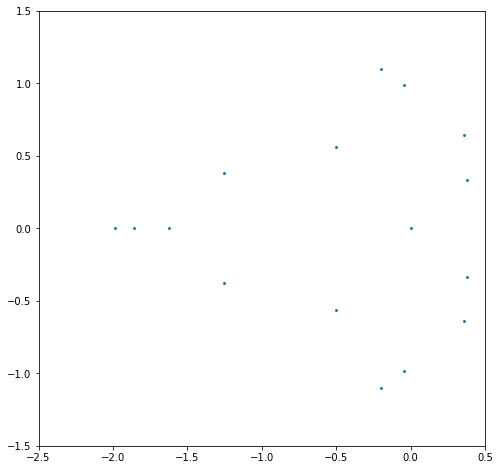

In [3]:
N = 5
p = Mandelbrot( N, Poly([0,1]))
rts = p.roots()
# print( rts )
import matplotlib.pyplot as plt
x = [rt.real for rt in rts]
y = [rt.imag for rt in rts]
rootplot = plt.figure( figsize=(8,8) )
plt.scatter( x, y, s=15, marker=".")
plt.xlim(-2.5,0.5)
plt.ylim(-1.5,1.5)
plt.show()

In [4]:
# Great.  Are those roots correct?
residuals = [p(rt) for rt in rts]
# print( residuals ) shows them all, and it's a confusing mess
absresiduals = [abs(r) for r in residuals ]
print( max(absresiduals) )

3.251288986100655e-11


That's, that's ok; it looks like we have in every case found the exact root of a polynomial different from $z_5(c)$ by no more than $3\cdot 10^{-11}$.  Wait, what?  Well, putting in a computed root back to the polynomial (assuming it evaluates correctly) gives us a residual, say $r$.  That is $p(c^*) = r$, some (hopefully small) complex number.  But then $c^*$ is the _exact_ root of the following polynomial: $p(c) - r$.  

Two questions: Did Python evaluate the polynomial well? That is, are the residuals accurate?  And second, what happens to a root if we slightly change a polynomial?  We've just wandered into numerical analysis territory.  Let's first compare the built-in evaluation of a polynomial by its coefficients to our iterative code.

In [5]:
r1 = rts[0]
residual1byPython = p( r1 )
residual1byIteration = Mandelbrot( n=N, c=r1 )
print( "Using n = ", N, "\nFor the computed root ", r1, "The residual by Python is ", residual1byPython, 
      "\nwhile the residual by iteration is ", residual1byIteration )

Using n =  5 
For the computed root  (-1.9854242530544686+0j) The residual by Python is  (3.251288986100655e-11+0j) 
while the residual by iteration is  (2.8044677691241304e-11+0j)


We see some minor difference in that computation.  But it seems nothing to worry about.  Perhaps we should try a larger N, just to be sure?

8.716105802730426e-05
Using n =  6 and degree d =  32 
For the computed root  (-1.9963759806778472+0j) The residual by Python is  (-8.716105802730426e-05+0j) 
while the residual by iteration is  (-6.782885117551096e-05+0j)


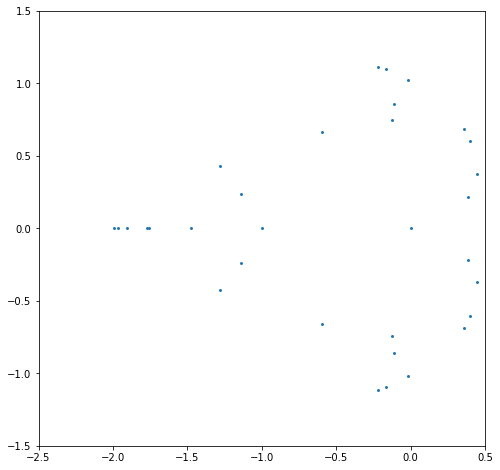

In [6]:
N = 6
p = Mandelbrot( N, Poly([0,1]))
rts = p.roots()
residuals = [p(rt) for rt in rts]
# print( residuals ) shows them all, and it's a confusing mess
absresiduals = [abs(r) for r in residuals ]
print( max(absresiduals) )
r1 = rts[0]
residual1byPython = p( r1 )
residual1byIteration = Mandelbrot( n=N, c=r1 )
print( "Using n = ", N, "and degree d = ", p.degree(), "\nFor the computed root ", r1, "The residual by Python is ", residual1byPython, 
      "\nwhile the residual by iteration is ", residual1byIteration )
x = [rt.real for rt in rts]
y = [rt.imag for rt in rts]
rootplot = plt.figure( figsize=(8,8) )
plt.scatter( x, y, s=15, marker=".")
plt.xlim(-2.5,0.5)
plt.ylim(-1.5,1.5)
plt.show()

Ooh, that's not very good.  Try n=7 and see it get much worse; n=8 and worse yet (ridiculously worse). The issue seems to either be Python's polynomial rootfinder (we kind of thought it would be bad, but were hoping it was better than that), or its evaluation of the polynomial from its coefficients.  Of course the two things are connected.  

1286641511465.3699
Using n =  7 and degree d =  64 
For the computed root  (-2.263775153261566+0j) The residual by Python is  (1286641511465.3699+0j) 
while the residual by iteration is  (1326567335916.792+0j)


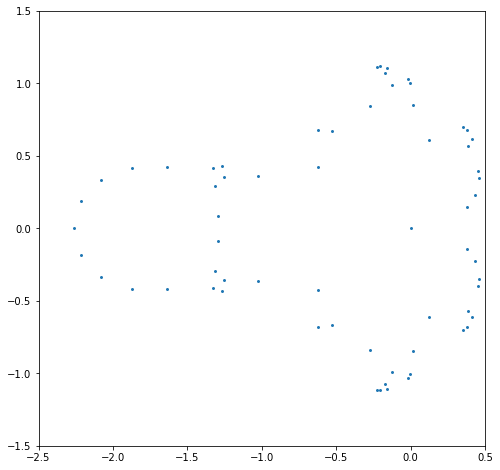

In [7]:
N = 7
p = Mandelbrot( N, Poly([0,1]))
rts = p.roots()
residuals = [p(rt) for rt in rts]
# print( residuals ) shows them all, and it's a confusing mess
absresiduals = [abs(r) for r in residuals ]
print( max(absresiduals) )
r1 = rts[0]
residual1byPython = p( r1 )
residual1byIteration = Mandelbrot( n=N, c=r1 )
print( "Using n = ", N, "and degree d = ", p.degree(), "\nFor the computed root ", r1, "The residual by Python is ", residual1byPython, 
      "\nwhile the residual by iteration is ", residual1byIteration )
x = [rt.real for rt in rts]
y = [rt.imag for rt in rts]
rootplot = plt.figure( figsize=(8,8) )
plt.scatter( x, y, s=15, marker=".")
plt.xlim(-2.5,0.5)
plt.ylim(-1.5,1.5)
plt.show()

The fact that the roots near $-2$ have _exploded_ (see the fireworks GIF at the beginning) can be explained using what are known as _pseudozeros_.

Instead of pursuing that now, though, let us do something different. Namely, let us introduce an approximate formula for the _largest magnitude root_:
\begin{equation*}
\rho_k \approx -2 + \frac32 \pi^2 4^{-k} + O(4^{-2k}) .
\end{equation*}
This formula was published in 2013 by one of us (RMC) and his then-student Piers W. Lawrence, and with the help of another of us (NJC).  We (the present authors, including EYSC) discuss it a bit in our paper [Some Facts and Conjectures on Mandelbrot Polynomials](https://doi.org/10.5206/mt.v1i1.14037) but for now let's just use it.

In [8]:
import math
rho = lambda k: -2 + 3*math.pi**2*4**(-k)/2
print( rho(5) - -1.9854242530543296 ) # Was -1.9854242530543296 above
print( rho(6) - -1.9963773629263977 ) # Was -1.9963773629263977+0j above
print( 4**6*Mandelbrot( n=6, c=rho(6) ) ) # Like 4 times 4 (pattern observed experimentally)
print( 4**7*Mandelbrot( n=7, c=rho(7) ) ) # Like 4 times 5
print( 4**8*Mandelbrot( 8, rho(8) )) # Like 4 times 6
print( 4**9*Mandelbrot( 9, rho(9) ))  # Like 4 times 7
print( 4**13*Mandelbrot( 13, rho(13) )) # Like 4 times 11

-0.00011831862376210367
-8.279993125359653e-06
16.828183511695897
20.712561469499633
24.591600405416102
28.468529149366077
44.025735571980476


Now we see something interesting (to a numerical analyst).  The largest root (computed by Python) is actually better than its residual indicates!  We also see something interesting to an analyst: there is apparently a pattern in the residual: the experiments above predict that
\begin{equation*}
z( \rho_k ) = \frac{4(k-2)}{4^k} + \cdots
\end{equation*}
and if this were true in general then this would be enough to deduce that there really is a root nearby: one Newton correction from here will help as we will see below (but this turns out to be tricky because the _second_ derivatives are so _large_ in this area; this fact interferes with the theory of Newton iteration, as you may eventually see in your numerical analysis class).  

Now let us see a nifty way to compute derivatives of the iteration: just differentiate the loop!  But we have to be careful to do it in the right order (this is quite weird).

In [9]:
def MandelbrotWithDerivative(n: int, c):
    dz = 0*c
    z = 0*c # try to inherit the type of c
    for i in range(n):
        dz = 2*z*dz + 1 # A bit iffy to add constants to Polynomials in Python, but maybe it works. Yes! It does!
        z = z*z + c
    return(z,dz)
print( MandelbrotWithDerivative( 3, -1.2 ) )
print( MandelbrotWithDerivative( 3, Poly([0,1])))


(-1.1423999999999999, 0.32800000000000007)
(Polynomial([0., 1., 1., 2., 1.], domain=[-1.,  1.], window=[-1.,  1.]), Polynomial([1., 2., 6., 4.], domain=[-1.,  1.], window=[-1.,  1.]))


The output there is a bit hard to read, but it _looks_ like it worked; the derivative of $z_3 = c + c^2 + 2c^3 + c^4$ is indeed $1 + 2c + 6c^2 + 4c^3$.  We don't really know what all that "domain" and "window" stuff is, but let's just use the numerical part: if we plug in $c=-1.2$ into $1 + 2c + 6c^2 + 4c^3$ we should get $0.328$.  Let's try it and see. 

In [10]:
pd = Poly( [1,2,6,4])
print( pd(-1.2))

0.3280000000000002


That looks good.  On this machine at the time of writing, the final digits are different (2 vs 7 from before) but it's convincing.  That code computes both $z(c)$ and $z'(c)$, with the same loop. So we can now take a Newton step. Or two.

In [11]:
pdp = MandelbrotWithDerivative( 6, rho(6) )
improved = rho(6) - pdp[0]/pdp[1]
print( rho(6), pdp[0], pdp[1], improved, Mandelbrot(6,improved) )
pdp2 = MandelbrotWithDerivative( 6, improved )
better = improved - pdp2[0]/pdp2[1]
print( better, Mandelbrot(6,better ))

-1.996385642919523 0.004108443240160131 -432.51765820326005 -1.9963761440166177 2.7235905697420293e-06
-1.9963761377111966 1.2387868508767497e-12


Good!  Now we can (maybe) check Python's rootfinder for larger $N$.  Let's try $N=8$.

In [12]:
N = 8
z = Mandelbrot( N, Poly([0,1]))
print( z.degree() )
rts = z.roots()
print( rts[0] )  # Hopelessly wrong (can't be smaller than -2)
rho8 = rho(8)
print( z( rho8 ) ) # Disaster has struck the polynomial evaluation
print( Mandelbrot(n=N, c=rho8)) # The iteration is better; *much* better

128
(-3.668564273119099+0j)
-1.9744758160196454e+34
0.0003752380432955338


We see that the built-in Python rootfinder has failed hopelessly, already at $N=8$ (when there are only $128$ roots to compute). There is a technical issue here: this polynomial is what is known as _ill-conditioned_. That means that it is _sensitive to changes in its input_.  We could pursue that, with the notion of _pseudozeros_ (and that's what leads to the fireworks GIF that we opened this section with), but for the moment we will try another tack: instead of working with Mandelbrot polynomials, we will work with Mandelbrot _matrices_, which turn out to be much better behaved.  

(MandelbrotActivity-7)=

```{admonition} Mandelbrot Activity 7
:class: tip
Prove by induction that the code `MandelbrotWithDerivative` computes the correct derivative of every Mandelbrot polynomial. Rather, that it _would_ compute the correct derivative if the underlying arithmetic were exact. You might need what is known as a _loop invariant_: something that is true before the loop starts, and is true at the start of every iteration, and at the end of every iteration (though not necessarily true after each intermediate step of the iteration). But this loop is simple enough that a direct induction also works.
{ref}`[Our proof] <MandelbrotActivityReport-7>`
```

(MandelbrotActivity-8)=

```{admonition} Mandelbrot Activity 8
:class: tip
Are the zeros of the derivatives of the Mandelbrot polynomials in the Mandelbrot set? 
{ref}`[We think so, but we don't know.] <MandelbrotActivityReport-8>`
```


## Eigenvalues and roots of polynomials

In the previous unit, on Bohemian matrices, we introduced introduce matrices (via determinants) and eigenvalues of matrices.  In this unit, we're going to use them without defining them further.  This is kind of backwards if you haven't had a course in linear algebra, but we also saw two-by-two matrices at least back in the Fibonacci unit, and many high schools do cover matrices at least a little bit.  Eigenvalues, not so much.  But then, eigenvalues aren't covered enough in many first courses in linear algebra, either, so the practice here is justified, in our minds.

Eigenvalues of matrices are related to roots of polynomials in the following two ways: first, if we are given a monic polynomial, say $x^3 -2 x^2 - 5x + 9$, then the three-by-three matrix below (three by three because the polynomial has degree $3$)

$$
\mathbf{A} = \begin{bmatrix}
0 & 0 & -9 \\
1 & 0 &  5 \\
0 & 1 &  2
\end{bmatrix}
$$

has as its _eigenvalues_ the exact roots of the polynomial.  Notice that the _negatives_ of the polynomial coefficients appear in the final column, and that there is a diagonal of 1s appearing _below_ the main diagonal of the matrix.  This construction is perfectly general: take any monic polynomial, negate its coefficients (except the leading coefficient, which is 1), list them in increasing degree as you go down the final column, and throw 1s along the subdiagonal, then you have a matrix whose eigenvalues are the roots of the original polynomial.  This is called a _companion matrix_ for the polynomial (there are many: this is the [Frobenius](https://en.wikipedia.org/wiki/Ferdinand_Georg_Frobenius) companion matrix). 

Since Python (and every scientific computing language) has a routine to compute eigenvalues, this gives us a perfectly straightforward way to find the roots of a polynomial.

In [22]:
from scipy.linalg import eigvals, tri

A = np.zeros([3,3])
A[0,2] = -9
A[1,0] = 1
A[1,2] = 5
A[2,1] = 1
A[2,2] = 2

e = eigvals(A)
print( A, e )

[[ 0.  0. -9.]
 [ 1.  0.  5.]
 [ 0.  1.  2.]] [-2.18194334+0.j  1.59357935+0.j  2.58836399+0.j]


In [25]:
p = Poly( [9,-5,-2,1])
print( p, p.roots() )
residuals = [p(t) for t in e ]
print( residuals )

9.0 - 5.0 x**1 - 2.0 x**2 + 1.0 x**3 [-2.18194334  1.59357935  2.58836399]
[(-4.263256414560601e-14+0j), (1.7763568394002505e-15+0j), 0j]


Voilà.  The same numbers appear (possibly in a different order).  This is in fact how numpy's `roots` command works, and how the `Polynomial` package allows its polynomials to find their roots.  Notice that the values of the polynomial at the computed eigenvalues are all _nearly_ zero, and the difference (when its not actually zero) is small enough to be considered the effects of rounding error.

### But wait, that's backwards!

The second way of connecting matrices and polynomials, though, is one we have seen already: given a matrix, we define its eigenvalues as the _roots of its "characteristic polynomial"_.  This is "reducing the problem to a previously solved one", if you know how to find roots of polynomials.  Turns out, that's actually harder, computationally speaking!  But for the record, here is where we got that polynomial in the first place.

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 & 2 
\\
 -1 & 0 & 1 
\\
 1 & 2 & 0 
\end{bmatrix}
$$

which has characteristic polynomial det$(\lambda\mathbf{I}-\mathbf{B}) = \lambda^{3}-2 \lambda^{2}-5 \lambda +9 $.  Apart from the variable name, this is the same polynomial as above.  Therefore both $\mathbf{B}$ and $\mathbf{A}$ have the same _eigenvalues_. 

In [24]:
B = np.array([[2,-1,2],[-1,0,1],[1,2,0]])

print(B, eigvals(B) )

[[ 2 -1  2]
 [-1  0  1]
 [ 1  2  0]] [-2.18194334+0.j  2.58836399+0.j  1.59357935+0.j]


```{prf:remark}
:label: eigenvalue_remark

It may seem silly, and wasteful, to solve polynomials by finding eigenvalues of matrices.  Against that, we actually have software for eigenvalue problems that is _really good_ in the sense that it is robust, accurate, and efficient.  So we are "reducing the problem to a previously solved problem" which is like recycling, and so is not wasteful in that sense.  However, at some point the wastefulness (we store $d^2$ numbers, or sometimes even more, to attack a polynomial of degree $d$) will catch up to us.  But it turns out that this "wasteful" approach gets us _farther_ than trying to solve the Mandelbrot polynomials directly does.

It does turn out to be wasteful to start with a matrix, compute a characteristic polynomial, and then construct another matrix.  You might just as well have computed the eigenvalues of the original matrix.  Indeed, that's almost always _much_ better from the point of view of numerical stability.  But that is a topic for your numerical analysis class.

```

(MandelbrotActivity-9)=

```{admonition} Mandelbrot Activity 9
:class: tip
This is a more theoretical activity, and helps to explain why polynomials are sometimes hard to deal with directly in numerical computation.  This particular discussion is not in many textbooks, but is in some.
"A good numerical method gives you the exact solution to a nearby problem".  This is an informal definition of _numerical stability_.  An _algorithm_ is "numerically stable" if it gives you the exact solution, not to the problem you were trying to solve (say the polynomial $z(c) = 0$) but instead to a _nearby_ problem, say $z(c) - 10^{-16}i = 0$.  Some problems, however, are _sensitive to changes_ (in the vernacular of numerical analysis, _ill-conditioned_).  Consider the polynomial
$z(c) = \sum_{k=0}^d a_k c^k$
and a _perturbed_ (changed) polynomial
$z(c) + \Delta(c) = \sum_{k=0}^d a_k(1+s_k) c^k$
where the coefficients $a_k$ have all been changed by small relative amounts $s_k$.  Suppose further that all $|s_k| \le t$, some tiny number. By using the triangle inequality, show that
$
| \Delta(c) | \le K(c) t
$
where 
$
K(c) = \sum_{k=0}^d |a_k| |c|^k
$
This number $K(c)$ serves as a kind of _condition number_ for the polynomial: the larger it is, the more sensitive the polynomial is.  Plot the condition numbers (on a log scale!) of the Mandelbrot polynomials $z_6(c)$ and $z_7(c)$ on $-2 \le c \le 0$.
{ref}`[Our thoughts] <MandelbrotActivityReport-9>`
```


(MandelbrotActivity-10)=

```{admonition} Mandelbrot Activity 10
:class: tip
__Pseudozeros__.  The zeros of $z(c) - 10^{-k}\exp(i\theta)$ for $k=6$, say, represent a _curve_ in $c$ space (let $\theta$ vary from $-\pi$ to $\pi$ so the tiny perturbation $10^{-6}\exp(i\theta)$ turns a full circle in the complex plane). As $k$ is taken larger, one expects these curves to surround the zeros of $z(c)$ itself.  Graph some pseudozeros of a Mandelbrot polynomial.  
{ref}`[Our code] <MandelbrotActivityReport-10>`
```

## Mandelbrot matrices

Let $\mathbf{M}_1 = [c]$ be the $1$-by-$1$ matrix whose determinant is $z_1(c)$. Now define
\begin{equation*}
    \mathbf{M}_{k+1} = 
    \begin{bmatrix}
    \mathbf{M}_k & -c \mathbf{e}_1\mathbf{e}_{d_k}^T \\
    \mathbf{e}_1\mathbf{e}_{d_k}^T & \mathbf{M}_k
    \end{bmatrix} .
\end{equation*}
Here the $\mathbf{e}_j$'s are the unit elementary vectors of dimension $d_k=2^{k-1}$; all they do together here is put a $1$ in the top right corner of the relevant blocks. 

Just to explain that a bit more: if the dimension is 5, say, then $\mathbf{e}_1^T = [1,0,0,0,0]$ and $\mathbf{e}_5^T = [0,0,0,0,1]$.  The superscript T means "transpose" and we can use it (as in this paragraph) just to save space and write the column vectors on one line, or we can use it as in the formula to indicate what we really mean.  Elementary vectors are all zero except for one 1, and they are used here just to keep the notation neat.  They do have many other uses, so we don't mind introducing a notation for such a simple-looking thing.  The product $\mathbf{e}_1^T\mathbf{e}_5$ is a $5$ by $5$ matrix that is all zero except for a $1$ in the upper right hand corner.

The next two Mandelbrot matrices are then, by this recurrence relation,
\begin{equation*}
    \left[\begin{array}{cc}
c  & -c  
\\
 1 & c  
\end{array}\right]
\end{equation*}
and
\begin{equation*}
    \left[\begin{array}{cccc}
c  & -c  & 0 & \mathbf{-{c}}  
\\
 1 & c  & 0 & 0 
\\
 0 & \mathbf{1} & c  & -c  
\\
 0 & 0 & 1 & c  
\end{array}\right]
\end{equation*}
where we have bold-faced the two new entries that connect the two copies of $\mathbf{M}_2$ that lie in the upper left corner and bottom right corner.
    
We can write this matrix as $\mathbf{A} + c\mathbf{B}$ where
\begin{equation*}
\mathbf{A} = \begin{bmatrix}
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 
\end{bmatrix}
\end{equation*}
and
\begin{equation*}
\mathbf{B} = \begin{bmatrix}
1 & -1 & \phantom{-}0 & -1 \\
0 & \phantom{-}1 & \phantom{-}0 & \phantom{-}0 \\
0 & \phantom{-}0 & \phantom{-}1 & -1\\
0 & \phantom{-}0 & \phantom{-}0 & \phantom{-}1 
\end{bmatrix} .
\end{equation*}
Finding values of $c$ which make the determinant of $\mathbf{A} + c \mathbf{B}$ equal to zero is an example of what is called a _generalized_ eigenvalue problem, and [SciPy's linalg routine eigvals](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html#scipy.linalg.eigvals) is set up do do this already, except that it solves problems of the form $\det( \mathbf{A} - \lambda \mathbf{B} ) = 0$ so we will have to change the sign of our matrix $\mathbf{B}$.

The matrix $\mathbf{A_k}$ is analogous at every dimension $k$: it is zero except for the subdiagonal which is all $1$s.  The matrix $\mathbf{B}_k$ is very simply constructed from two copies of the matrix $\mathbf{B}_{k-1}$ (if $k>1$), with an additional $-1$ tucked into the upper right corner.  We might as well build $-\mathbf{B}_k$ instead of building $\mathbf{B}_k$ while we are at it.  We will do this _recursively_.  See the code below.

In [ ]:
def getMinusBmatrix(n: int):
    d = 2**(n-1)
    if n==1: 
        minusB = -np.ones([1,1]) # Return a 1 by 1 matrix of ones
        return( minusB )
    else:
        zeroBlock = np.zeros( [d//2,d//2] )  # The double slash enforces integer division
        smallerB  = getMinusBmatrix( n-1 )  # This is a recursive program: it calls itself.
        minusB = np.bmat( 'smallerB, zeroBlock; zeroBlock, smallerB')
        minusB[0,-1] = 1 # Glue the two blocks together with a 1 in the upper right corner
        return( minusB )

def getAmatrix(n: int):
    d = 2**(n-1)
    A = np.zeros([d,d])
    for i in range(1,d):
        A[i,i-1] = 1    # Subdiagonal entries are all 1, everything else is 0
    return A

In [ ]:
N = 2
A = getAmatrix( N  )
B = getMinusBmatrix( N )
print( N, A , "\n", B )
N = 3
A = getAmatrix( N  )
B = getMinusBmatrix( N )
print( N, A, "\n", B )
N = 4
A = getAmatrix( N  )
B = getMinusBmatrix( N )
print( N, A, "\n", B )

In [ ]:
N = 8
A = getAmatrix( N  )
B = getMinusBmatrix( N )
# Now compute the generalized eigenvalues
E = eigvals( A, B )
x = [e.real for e in E]
y = [e.imag for e in E ]
residuals = [ Mandelbrot(N,e) for e in E]
absresiduals = [abs(r) for r in residuals ]
print( max(absresiduals) )
rootplot = plt.figure( figsize=(8,8) )
plt.scatter( x, y, s=15, marker=".")
plt.xlim(-2.5,0.5)
plt.ylim(-1.5,1.5)
plt.show()

This shows that (at least for $N=8$) solving the (generalized) eigenvalue problem is _much_ more accurate than trying to solve the explicit Mandelbrot polynomial at the same dimension.

Now it turns out that the matrix method will also (eventually) run into trouble, at about $N=17$ (when RMC's computer tries to store all the zeros in the $d$ by $d$ matrix, and runs out of memory); the dimension of the matrix for $N=14$ is already $16384$ by $16384$, using about sixteen thousand times too much memory, and so this isn't that surprising.

Here are some results of running this code on a 2019 Microsoft Surface Pro (1.3GHz, 4 cores; not that the 4 cores are specially used by Python).  We report the Mandelbrot index, the dimension, the time taken in seconds, and the maximum absolute value of the residual.  We see that in all the cases we get accurate roots, but we also see that as the dimension doubles the cost increases by _more_ than a factor of $2^3=8$, consistently; we do not know why.  We estimated that running this for $N=14$ would take about $3$ hours (it took $2$ hours and $22$ minutes), and would return all roots to about single precision accuracy, which it did (we are working in double precision, of course).  We could use a supposedly faster language (Julia, for instance: except that, ironically, Python seems to be faster for generalized eigenvalues) to speed the computation up, but the _condition number_ of these eigenvalues also seems to be growing; this means the accuracy will diminish.  Another approach seems needed: see MPSolve, and see [Eunice Chan's Master's thesis](https://ir.lib.uwo.ca/etd/4028/).  Also, _generalized_ eigenvalue code is (quite a bit!) slower than code for the simple eigenvalue problem $\mathbf{A}\mathbf{x} = \lambda \mathbf{x}$ and we could convert our generalized eigenvalue problem to a simple one by postmultiplying by $\mathbf{B}^{-1}$ (we can even do that analytically, and this works _very_ well: see the exercises) but for now we will step away from the keyboard, happy with accurately computing the roots of the degree $8192$ Mandelbrot polynomial by means of a generalized eigenvalue problem. 

| n  | d    | time(s) | slowdown | max residual       |
|----|------|---------|----------|--------------------|
| 9 | 256  | 0.06     |          | $2.8\cdot 10^{-11}$                   |
| 10 | 512  | 0.6     | 10.       | $1.8\cdot 10^{-10}$                   |
| 11 | 1024 | 6       | 10.       | $1.6\cdot 10^{-9}$                   |
| 12 | 2048 | 78      | 13.       | $3.5\cdot 10^{-9}$ |
| 13 | 4096 | 850     | 11.     | $2.0\cdot 10^{-8}$ |
| 14 | 8192 | 8512    | 10.       | $4.0\cdot 10^{-7}$ |

```{prf:remark}
:label: memory_remark

If we are more careful with memory and use what are known as _sparse_ matrices, then we can go a lot farther.  Using sparse matrices, and special algorithms for finding eigenvalues of sparse matrices, Piers Lawrence was able to take this approach up to about a half a million eigenvalues ($n=19$); it was a bit awkward to make sure that we got all the eigenvalues once and only once, but it worked.  Eunice Chan got up over two million eigenvalues with a different method (homotopy continuation), but the champion is still MPSolve; Dario Bini and Leonard Robol used their software to compute over four million roots of Mandelbrot polynomials.
```

In [ ]:
import time
start = time.time()
N=9
A = getAmatrix( N  )
B = getMinusBmatrix( N )
# print( A, "\n", B )
built = time.time()
E = eigvals( A, B )
end = time.time()
x = [e.real for e in E]
y = [e.imag for e in E ]
residuals = [ Mandelbrot(N,e) for e in E]
absresiduals = [abs(r) for r in residuals ]
print( max(absresiduals) )
print( "Time taken was ", end-built, "seconds to find d=", 2**(N-1), 
      "\ngeneralized eigenvalues of matrices that took ", built-start, "seconds to build" )

In [ ]:
rootplot = plt.figure( figsize=(8,8) )
plt.scatter( x, y, s=0.5, marker=".")
plt.xlim(-2.5,0.5)
plt.ylim(-1.5,1.5)
plt.show()

The following is the resulting image from the case $N=14$:

```{image} ../Figures/Mandelbrot/MandelbrotZ14.png
:height: 400px
:alt: Our best eigenvalue image of the roots of a Mandelbrot polynomial of degree 8192
:align: center
```

## Looking back at the programming constructs used in this unit

We introduced more linear algebra routines.  We found out how to compute roots of polynomials (by computing eigenvalues of companion matrices, using the eigenvalue routine as a "black box"). We used the `//` integer division operation for the first time.

We introduced "hints" for the types of arguments in a procedure.  This is more important in other languages than in Python (indeed, it is _critical_ for many).

We showed a programmatic method for inheriting types (possibly not actually necessary in the example we used, because adding scalars to `Polynomials` produces a `Polynomial` anyway).

We showed that one can _differentiate a program_ or _take the derivative of a program_ (indeed this can be done by computers as well, in which case it is called "automatic differentiation" or "program differentiation").  Doing this _efficiently_ is sometimes an issue, but given how tedious differentiation can be, we will take all the help we can get.

## More Mandelbrot Activities

(MandelbrotActivity-11)=

11\. Write $\mathbf{C} = \mathbf{A}\mathbf{B}^{-1}$ and show that the generalized eigenvalues of $\mathbf{A}-\lambda\mathbf{B}$ are the simple eigenvalues of $\mathbf{C} - \lambda\mathbf{I}$.  Find $\mathbf{C}$ for the Mandelbrot matrices above, and code it up and compare the times to compute simple eigenvalues versus generalized eigenvalues. How high a degree can you get to?  We stopped at $N=16$, where the computation took about an hour and a half, and the residual was about $4.0e-5$.  The current record is held by [MPSolve](https://numpi.dm.unipi.it/software/mpsolve) with $k=23$, so over $4$ million roots (using multiple precision); we don't think eigenvalue methods can get that high, but we think [homotopy methods](https://ir.lib.uwo.ca/etd/4028/) can, although they haven't yet. {ref}`[Our thoughts] <MandelbrotActivityReport-11>`

(MandelbrotActivity-12)=

12\. Eigenvalues of perturbed matrices are called _pseudospectra_ (the set of eigenvalues themselves is called the _spectrum_).  $\Lambda_\varepsilon(\mathbf{A}) := \{z : \exists \mathbf{E} \backepsilon \mathrm{det}(z\mathbf{I} - (\mathbf{A}+\mathbf{E})) = 0 \& \|\mathbf{E}\| \le \varepsilon\}$. That definition means, in words, that the pseudospectrum at size $\varepsilon$ is the set of complex numbers $z$ that are the exact eigenvalues of matrices perturbed by another matrix $\mathbf{E}$ which is at most $\varepsilon$ in norm.  Check out the [Pseudospectra gateway](https://www.cs.ox.ac.uk/pseudospectra/) and then do some pseudospectral experiments with Mandelbrot matrices. {ref}`[Our thoughts] <MandelbrotActivityReport-12>`

(MandelbrotActivity-13)=

13\. Other families of polynomials like the Mandelbrot polynomials can be defined: Fibonacci&ndash;Mandelbrot polynomials defined by $q_{n+1}(z) = z q_n(z) q_{n-1}(z) + 1$ and $q_0(z)=0$ and $q_1(z) = 1$, for instance; or Fibonacci&ndash;Narayana polynomials.  Define your own polynomials by recurrence relation, and find your own matrices whose eigenvalues are their roots, and draw their eigenvalues.  We have only done a few of these, and there are infinitely many to choose from.  It's possible your results will be completely new (and therefore publishable). {ref}`[Our thoughts] <MandelbrotActivityReport-13>`

(MandelbrotActivity-14)=

14\. The paper [Some Facts and Conjectures on Mandelbrot Polynomials](https://doi.org/10.5206/mt.v1i1.14037) contains a formula for the _Mandelbrot Generating Function_ MGF(k,c), which _analytically solves_ the Mandelbrot iteration $z_{n+1} = z_n^2 + c$, at least for $c$ _outside_ the Mandelbrot set.  This means that we could (say) take half an iteration&mdash;and find $z_{1/2}(c)$ or $z_{3/2}(c)$.  As with [Stand-Up Math's Video on Complex Fibonacci Numbers](https://youtu.be/ghxQA3vvhsk) these are likely to be _complex numbers_.  So far as we know, no-one (not even us) has computed these.  Do so, for (say) $c=1$ or $c=2$.  Plot the results.  This, also, might be publishable (again, [Maple Transactions](https://www.mapletransactions.org) might be a good place). {ref}`[Our thoughts] <MandelbrotActivityReport-14>`

(MandelbrotActivity-15)=

15\. A [companion matrix](https://en.wikipedia.org/wiki/Companion_matrix) for a polynomial (say $P(\lambda)$) is simply a matrix $C$ whose eigenvalues are the roots of $P(\lambda)$.  Every matrix has a characteristic polynomial whose roots are its eigenvalues; what's interesting is that this can be run the other way (it's a bit more complicated because "Frobenius companion matrices" as in the link above have special properties).  But companion matrices are not unique: any matrix similar to a companion matrix $\mathbf{S}\mathbf{C}\mathbf{S}^{-1}$ is also a companion matrix for that same $P(\lambda)$.  Suppose that you have a polynomial with _integer_ coefficients.  Then the Frobenius companion matrix has (those same) integers as entries, together with ones and zeros.  Therefore, out of all integer companion matrices for $P(\lambda)$, there must be one with _minimal height_: the height of the matrix is the size of the largest absolute value of any entry in the matrix.  Mandelbrot matrices as defined above have height $1$, which is the smallest possible for integer companions, and are therefore "minimal height".  Note that the size of the coefficients of the polynomial are exponential in the degree! So the height of the Frobenius companion matrix of Mandelbrot polynomials is likewise exponential.  Not much is known about [minimal height companion matrices](https://link.springer.com/article/10.1007/s11786-018-0364-2) (see also [our first paper](https://journals.uwyo.edu/index.php/ela/article/view/1781)); we do not have an algorithm for finding one for a given integer polynomial, for instance. We _believe_ that minimal height companion matrices are generally better-conditioned as far as their eigenvalues, but we have no proof.  Find a minimal height companion matrix for (say) $\lambda^3 + 5\lambda^2 + 3\lambda + 1$.  Find a general algorithm for computing minimal height companions.  Prove that they're useful.  If you succeed at this problem, you should certainly publish your results; a good venue might be the [Electronic Journal of Linear Algebra](https://journals.uwyo.edu/index.php/ela). {ref}`[Our thoughts] <MandelbrotActivityReport-15>`

(MandelbrotActivity-16)=

16\. Take some time and write down some of your own questions about this material.  As you can see, there is lots left to discover, here. {ref}`[Our thoughts] <MandelbrotActivityReport-16>`